In [1]:
!pip uninstall -y protobuf
!pip install protobuf==3.20.3



import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


Found existing installation: protobuf 6.33.0
Uninstalling protobuf-6.33.0:
  Successfully uninstalled protobuf-6.33.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 4.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
opentelemetry-proto 1.37.0 requires protobuf<7.0,>=5.0, but you have protobuf 3.20.3 which is incompatible.
onnx 1.18.0 requires protobuf>=4.25.1, but you have protobuf 3.20.3 which is incompatible.
a2a-sdk 0.3.10 requires protobuf>=5.29.5, but you have protobuf 3.20.3 which is incompatible.
ray 2.51.1 requires click!=8.3.0,>=7.0, but you have click 8.3.0 which is incompatible.
bigframes 2.12.0 requires rich<14,>=12.4.4, but you have rich 14.2.0 which is incompatible.
tensorflow-metadata 1.17.2 requires protobuf>=4.25.2; pyth

2025-11-25 02:37:32.298631: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764038252.486281      20 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764038252.543875      20 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<h1 style="color: black; background-color: #ff99ff; text-align: center; padding: 12px; border-radius: 10px;">
 Import Library
</h1>

In [2]:
import os
import random
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


<h1 style="color: black; background-color: #ff99ff; text-align: center; padding: 12px; border-radius: 10px;">
  Visualization some image
</h1>

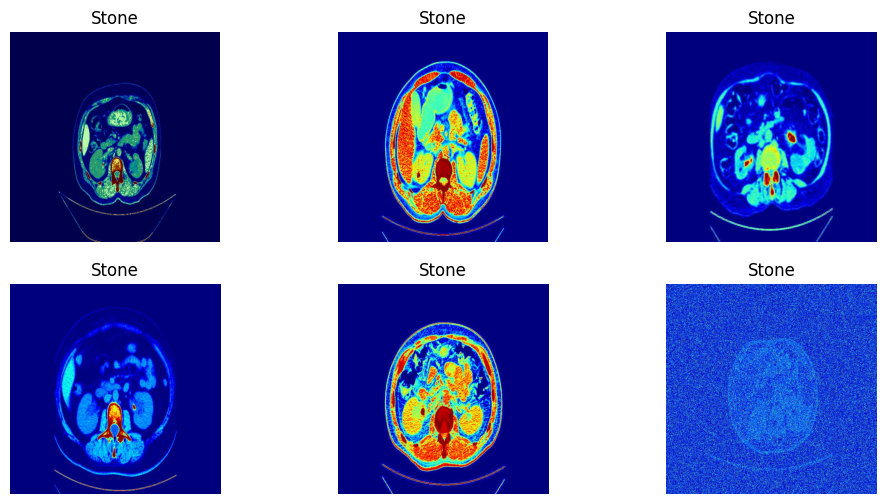

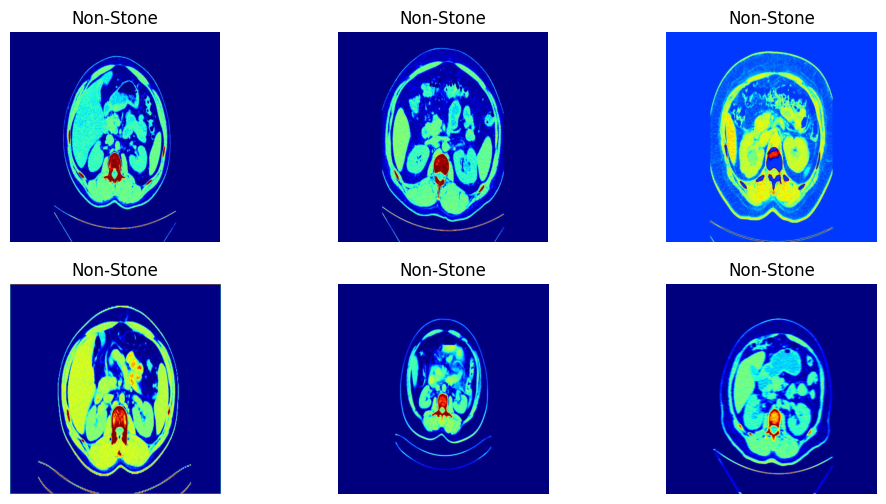

In [3]:
def show_random_images(folder, class_name, n=6):
    path = os.path.join(folder, class_name)
    images = os.listdir(path)

    plt.figure(figsize=(12, 6))
    for i in range(n):
        img = random.choice(images)
        img_path = os.path.join(path, img)
        img_arr = plt.imread(img_path)

        plt.subplot(2, 3, i+1)
        plt.imshow(img_arr, cmap='gray')
        plt.title(class_name)
        plt.axis("off")

    plt.show()

dataset_path = "/kaggle/input/kidney-stone-axial-ct-imaging-colorized-mixeddata/Axial CT Imaging Dataset for AI-Powered Kidney Stone Detection A Resource for Deep Learning Research dataset/train"

show_random_images(dataset_path, "Stone")
show_random_images(dataset_path, "Non-Stone")


<h1 style="color: black; background-color: #ff99ff; text-align: center; padding: 12px; border-radius: 10px;">
  Class Distribution (EDA)
</h1>

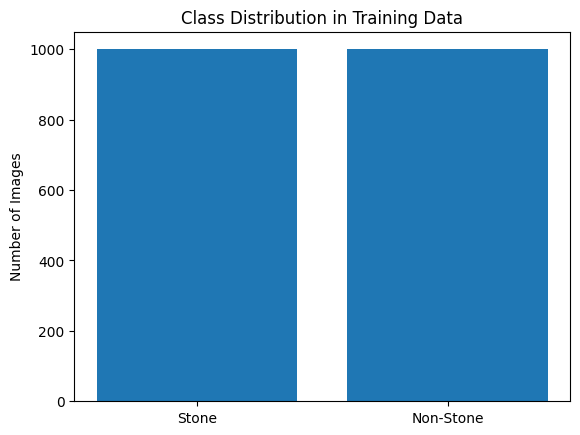

In [4]:
stone_count = len(os.listdir("/kaggle/input/kidney-stone-axial-ct-imaging-colorized-mixeddata/Axial CT Imaging Dataset for AI-Powered Kidney Stone Detection A Resource for Deep Learning Research dataset/train/Non-Stone"))
nonstone_count = len(os.listdir("/kaggle/input/kidney-stone-axial-ct-imaging-colorized-mixeddata/Axial CT Imaging Dataset for AI-Powered Kidney Stone Detection A Resource for Deep Learning Research dataset/train/Stone"))

plt.bar(["Stone", "Non-Stone"], [stone_count, nonstone_count])
plt.title("Class Distribution in Training Data")
plt.ylabel("Number of Images")
plt.show()


<h1 style="color: black; background-color: #ff99ff; text-align: center; padding: 12px; border-radius: 10px;">
 ImageDataGenerator
</h1>

In [5]:
img_size = 224
batch = 32

train_datagen = ImageDataGenerator(rescale=1/255)
val_datagen   = ImageDataGenerator(rescale=1/255)
test_datagen  = ImageDataGenerator(rescale=1/255)

train_data = train_datagen.flow_from_directory(
    "/kaggle/input/kidney-stone-axial-ct-imaging-colorized-mixeddata/Axial CT Imaging Dataset for AI-Powered Kidney Stone Detection A Resource for Deep Learning Research dataset/train",
    target_size=(img_size, img_size),
    batch_size=batch,
    class_mode="binary"
)

val_data = val_datagen.flow_from_directory(
    "/kaggle/input/kidney-stone-axial-ct-imaging-colorized-mixeddata/Axial CT Imaging Dataset for AI-Powered Kidney Stone Detection A Resource for Deep Learning Research dataset/validation",
    target_size=(img_size, img_size),
    batch_size=batch,
    class_mode="binary"
)

test_data = test_datagen.flow_from_directory(
    "/kaggle/input/kidney-stone-axial-ct-imaging-colorized-mixeddata/Axial CT Imaging Dataset for AI-Powered Kidney Stone Detection A Resource for Deep Learning Research dataset/test",
    target_size=(img_size, img_size),
    batch_size=batch,
    class_mode="binary",
    shuffle=False
)


Found 2000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


<h1 style="color: black; background-color: #ff99ff; text-align: center; padding: 12px; border-radius: 10px;">
 CNN Model
</h1>

In [6]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1764038269.284030      20 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1764038269.284616      20 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

<h1 style="color: black; background-color: #ff99ff; text-align: center; padding: 12px; border-radius: 10px;">
 Train the Model
</h1>

In [7]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1764038273.328301      99 service.cc:148] XLA service 0x7a7e44004790 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1764038273.329110      99 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1764038273.329150      99 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1764038273.665719      99 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/63 ━━━━━━━━━━━━━━━━━━━━ 7:51 8s/step - accuracy: 0.5312 - loss: 0.6947

I0000 00:00:1764038278.603566      99 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 286ms/step - accuracy: 0.5383 - loss: 0.9464 - val_accuracy: 0.5000 - val_loss: 0.6879
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - accuracy: 0.6422 - loss: 0.6324 - val_accuracy: 0.7425 - val_loss: 0.4962
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.8287 - loss: 0.3880 - val_accuracy: 0.8725 - val_loss: 0.3257
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - accuracy: 0.9022 - loss: 0.2272 - val_accuracy: 0.8800 - val_loss: 0.2567
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - accuracy: 0.9150 - loss: 0.1972 - val_accuracy: 0.8675 - val_loss: 0.2647
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - accuracy: 0.9420 - loss: 0.1468 - val_accuracy: 0.8850 - val_loss: 0.2383
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - accuracy: 0.9555 - loss: 0.1132 - val_accuracy: 0.9000 - val_loss: 0.1836
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - accuracy: 0.9598 - loss: 0.1085 - val_accuracy: 0.8975 - val

<h1 style="color: black; background-color: #ff99ff; text-align: center; padding: 12px; border-radius: 10px;">
 Training Curves
</h1>

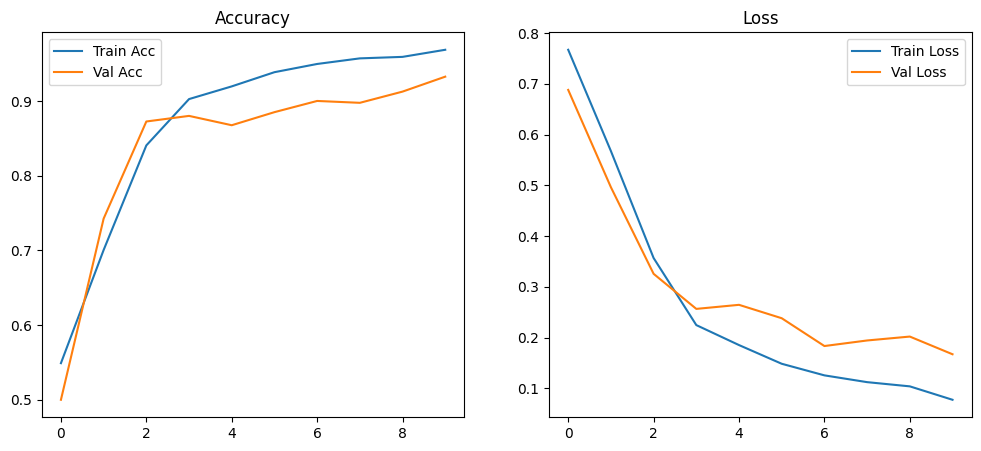

In [8]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.legend()
plt.title("Accuracy")

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()


In [9]:
model.evaluate(test_data)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - accuracy: 0.9379 - loss: 0.1226


[0.15807515382766724, 0.9350000023841858]

In [10]:
model.save("kidney_stone_cnn_model.h5")


<h1 style="color: black; background-color: #ff99ff; text-align: center; padding: 12px; border-radius: 10px;">
  Predication image
</h1>

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step
Prediction: Stone | Confidence: 0.72


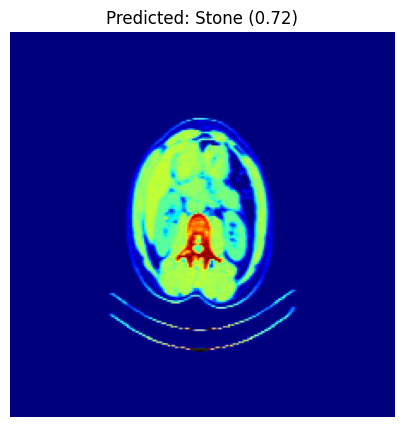

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# ------------------------------
# 1️⃣ Load the test image
# ------------------------------
img_path = "/kaggle/input/kidney-stone-axial-ct-imaging-colorized-mixeddata/Axial CT Imaging Dataset for AI-Powered Kidney Stone Detection A Resource for Deep Learning Research dataset/test/Stone/P038_FA_M_S_I02_Motion_Blur.jpg"

# Load and preprocess
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array_expanded = np.expand_dims(img_array, axis=0)

# ------------------------------
# 2️⃣ Predict
# ------------------------------
pred = model.predict(img_array_expanded)[0][0]

if pred > 0.5:
    pred_label = "Stone"
else:
    pred_label = "Non-Stone"

print(f"Prediction: {pred_label} | Confidence: {pred:.2f}")

# ------------------------------
# 3️⃣ Visualize image with prediction
# ------------------------------
plt.figure(figsize=(5,5))
plt.imshow(img_array)
plt.title(f"Predicted: {pred_label} ({pred:.2f})")
plt.axis("off")
plt.show()






---

# **About Me**

I’m **Arif Miah**, a CSE graduate and AI/ML enthusiast. I specialize in **Machine Learning, Deep Learning, NLP, and Computer Vision**, and I’m proficient in **Python frameworks** like **Keras, scikit-learn, TensorFlow, PyTorch, and OpenCV**.

I build **real-world applications** using **Streamlit** and **Flask**, and I’m a **3× Kaggle Expert** with a strong focus on practical AI solutions and research-driven projects.

---


  



  
### 🔗 Social & Contact

🧑‍💻 GitHub: https://github.com/Arif-miad  
🏆 Kaggle: https://www.kaggle.com/miadul  
💼 LinkedIn: https://www.linkedin.com/in/arif-miah-8751bb217/  
📱 WhatsApp: 01703468954  
✉️ Email: arifmiahcse@gmail.com  
▶️ YouTube: https://www.youtube.com/@intelliaiworld
